# Task 3 – Visualisation Portfolio

Academic-ready figures (white theme) and interactive dashboard assets are produced in tandem. Interpretive notes for the report are kept in `reports/notes/task3_visualization.txt`.

## Styling setup

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from IPython.display import display

ROOT = Path('..')
DATA_PATH = ROOT / 'data' / 'raw' / 'train_252145.csv'
FIGURES_DIR = ROOT / 'reports' / 'figures'
INTERACTIVE_DIR = FIGURES_DIR / 'interactive'
TABLES_DIR = ROOT / 'reports' / 'tables'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
INTERACTIVE_DIR.mkdir(parents=True, exist_ok=True)
TABLES_DIR.mkdir(parents=True, exist_ok=True)

COLORS = {
    'price': '#FFA500',        # solar orange
    'pv': '#2ca02c',    # battery green
    'demand': '#1f77b4',     # grid blue
    'storage': '#7f7f7f',   # neutral gray
}

mpl.rcParams.update({
    'figure.dpi': 110,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'axes.titleweight': 'semibold',
    'axes.titlelocation': 'left',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': '#d9d9d9',
    'grid.linestyle': '--',
    'grid.linewidth': 0.6,
    'axes.grid': True,
    'font.family': 'DejaVu Sans',
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.edgecolor': '#dddddd',
})

sns.set_theme(style='whitegrid')

COLORWAY = [COLORS['pv'], COLORS['demand'], COLORS['price'], COLORS['storage']]
pio.templates['energy_light'] = go.layout.Template(layout=dict(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family='Inter, Open Sans, sans-serif', color='#212529'),
    colorway=COLORWAY,
    xaxis=dict(gridcolor='#e9ecef', zerolinecolor='#e9ecef'),
    yaxis=dict(gridcolor='#e9ecef', zerolinecolor='#e9ecef'),
    legend=dict(bgcolor='rgba(255,255,255,0.85)', bordercolor='#ced4da', borderwidth=1),
    hoverlabel=dict(bgcolor='#f8f9fa', font=dict(color='#212529')),
))
pio.templates.default = 'energy_light'
px.defaults.template = 'energy_light'
px.defaults.color_discrete_sequence = COLORWAY


def save_figure(fig, basename, dpi=300):
    png_path = FIGURES_DIR / f'{basename}.png'
    pdf_path = FIGURES_DIR / f'{basename}.pdf'
    fig.savefig(png_path, dpi=dpi, bbox_inches='tight')
    fig.savefig(pdf_path, dpi=dpi, bbox_inches='tight')
    return png_path, pdf_path


def save_interactive(fig, basename):
    html_path = INTERACTIVE_DIR / f'{basename}.html'
    fig.write_html(html_path, include_plotlyjs='cdn')
    return html_path

## Load and enrich the dataset

In [2]:
# Load and enrich dataset
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp']).sort_values('timestamp')
df = df.set_index('timestamp')
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()
df['is_weekend'] = df.index.dayofweek >= 5

print("Enriched Dataset Head:")
display(df.head())

Enriched Dataset Head:


,pv_mod1,pv_mod2,pv_mod3,Demand,pv,Price,Temperature,Pressure (hPa),Cloud_cover (%),Cloud_cover_low (%),...,Cloud_cover_high (%),Wind_speed_10m (km/h),Shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),daymax,hour,day_of_week,is_weekend
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00+00:00,0.0,0.0,0.0,0.27,0.0,0.01605,13.5,1011.3,4,0,...,3,10.5,NaN,0,0,0.0,3.56,0,Monday,False
2013-07-01 01:00:00+00:00,0.0,0.0,0.0,0.23,0.0,0.00095,13.2,1010.8,27,1,...,23,11.9,NaN,0,0,0.0,3.56,1,Monday,False
2013-07-01 02:00:00+00:00,0.0,0.0,0.0,0.26,0.0,0.00060,13.1,1010.3,33,0,...,32,11.6,NaN,0,0,0.0,3.56,2,Monday,False
2013-07-01 03:00:00+00:00,0.0,0.0,0.0,0.28,0.0,0.00046,13.0,1010.3,28,0,...,27,11.2,NaN,2,7,30.1,3.56,3,Monday,False
2013-07-01 04:00:00+00:00,0.0,0.0,0.0,0.29,0.0,0.00046,13.8,1010.2,16,0,...,14,11.7,NaN,30,31,252.0,3.56,4,Monday,False


In [3]:
# Generate summary statistics
summary = df[['pv', 'Demand', 'Price']].describe().T.round(3)
summary_path = TABLES_DIR / 'task3_summary_stats.csv'
summary.to_csv(summary_path)

print("Summary Statistics:")
display(summary)

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
pv,8759.0,0.660,1.106,0.0,0.000,0.000,0.82,4.810
Demand,8759.0,0.531,0.375,0.0,0.280,0.380,0.66,4.240
Price,8759.0,0.046,0.025,0.0,0.028,0.045,0.06,0.255


## Figure 1 – Timeseries overlay

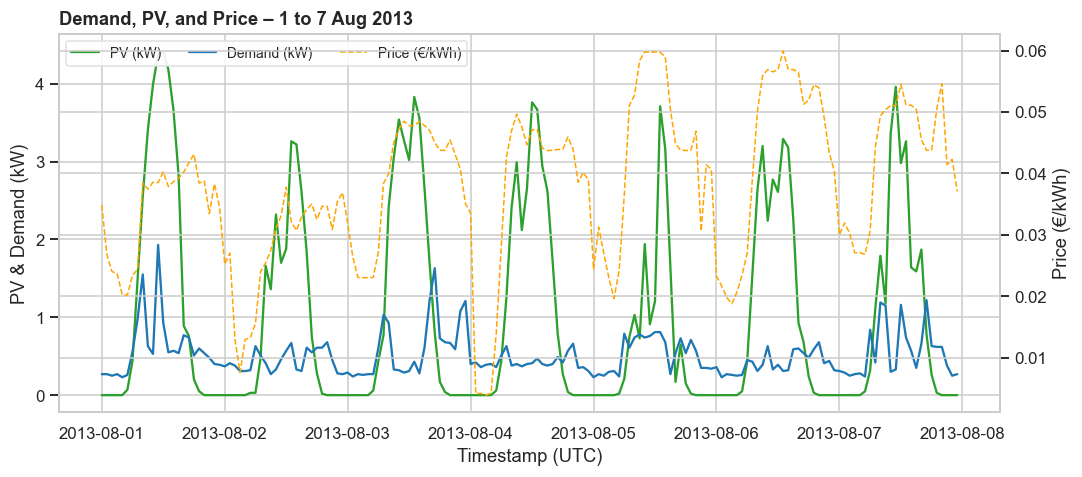

PosixPath('../reports/figures/interactive/03_timeseries_overlay_interactive.html')

In [9]:
# Figure 1: Timeseries Overlay of PV, Demand, and Price
# This visualization shows the temporal relationship between generation, consumption, and price signals
week_window = df.loc['2013-08-01':'2013-08-07']

fig, ax_left = plt.subplots(figsize=(10, 4.5))
ax_right = ax_left.twinx()

# Plot PV and Demand on the left y-axis
ax_left.plot(week_window.index, week_window['pv'], color=COLORS['pv'], linewidth=1.5, label='PV (kW)')
ax_left.plot(week_window.index, week_window['Demand'], color=COLORS['demand'], linewidth=1.5, label='Demand (kW)')

# Plot Price on the right y-axis
ax_right.plot(week_window.index, week_window['Price'], color=COLORS['price'], linewidth=1.0, linestyle='--', label='Price (€/kWh)')

# Labels and formatting
ax_left.set_title('Demand, PV, and Price – 1 to 7 Aug 2013')
ax_left.set_ylabel('PV & Demand (kW)')
ax_right.set_ylabel('Price (€/kWh)')
ax_left.set_xlabel('Timestamp (UTC)')

# Combine legends from both axes
lines, labels = ax_left.get_legend_handles_labels()
lines2, labels2 = ax_right.get_legend_handles_labels()
ax_left.legend(lines + lines2, labels + labels2, loc='upper left', ncol=3, fontsize=9)

fig.tight_layout()
save_figure(fig, '03_timeseries_overlay')
plt.show()

# Interactive version (save only, no display)
interactive_fig = go.Figure()
interactive_fig.add_trace(go.Scatter(x=week_window.index, y=week_window['pv'], name='PV (kW)', mode='lines'))
interactive_fig.add_trace(go.Scatter(x=week_window.index, y=week_window['Demand'], name='Demand (kW)', mode='lines'))
interactive_fig.add_trace(go.Scatter(x=week_window.index, y=week_window['Price'], name='Price (€/kWh)', mode='lines', yaxis='y2', line=dict(dash='dash')))
interactive_fig.update_layout(
    title='Demand, PV, and Price – 1 to 7 Aug 2013',
    xaxis_title='Timestamp (UTC)',
    yaxis=dict(title='PV & Demand (kW)'),
    yaxis2=dict(title='Price (€/kWh)', overlaying='y', side='right'),
)
save_interactive(interactive_fig, '03_timeseries_overlay_interactive')

**Figure 1.** PV, demand, and price dynamics during the first week of August 2013; evening demand peaks appear after solar output subsides.

## Figure 2 – Demand and PV distributions

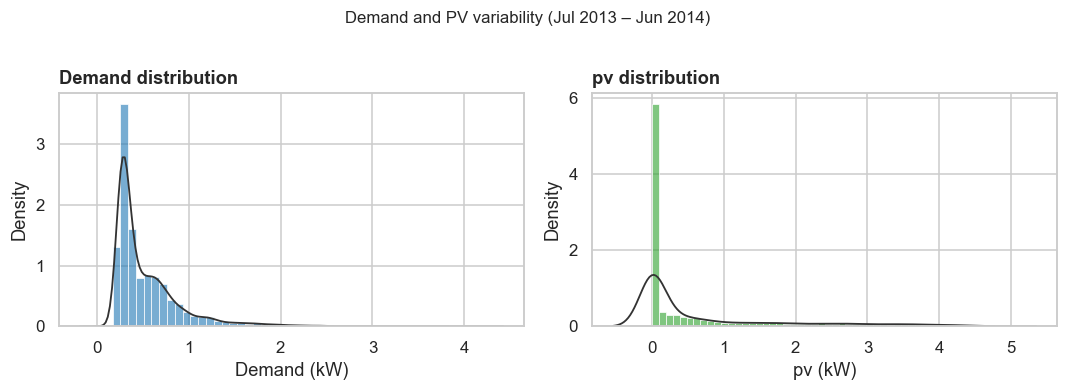

PosixPath('../reports/figures/interactive/03_distributions_interactive.html')

In [10]:
# Figure 2: Distribution Analysis of Demand and PV
# Histograms with KDE overlays to show the statistical properties of the variables
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

for ax, column, color in zip(axes, ['Demand', 'pv'], [COLORS['demand'], COLORS['pv']]):
    sns.histplot(df[column], bins=50, stat='density', color=color, alpha=0.6, edgecolor='white', ax=ax)
    sns.kdeplot(df[column], color='#333333', linewidth=1.2, ax=ax)
    ax.set_title(f'{column} distribution')
    ax.set_xlabel(f'{column} (kW)')
    ax.set_ylabel('Density')

fig.suptitle('Demand and PV variability (Jul 2013 – Jun 2014)', y=1.01, fontsize=11)
fig.tight_layout()
save_figure(fig, '03_distributions')
plt.show()

# Interactive version (save only, no display)
interactive_fig = go.Figure()
interactive_fig.add_trace(go.Histogram(x=df['Demand'], name='Demand', nbinsx=50, histnorm='probability density', opacity=0.6, marker_color=COLORS['demand']))
interactive_fig.add_trace(go.Histogram(x=df['pv'], name='PV', nbinsx=50, histnorm='probability density', opacity=0.6, marker_color=COLORS['pv']))
interactive_fig.update_layout(barmode='overlay', title='Demand and PV distributions', xaxis_title='Value (kW)', yaxis_title='Density')
save_interactive(interactive_fig, '03_distributions_interactive')

**Figure 2.** Histograms with KDE overlays showing typical operating ranges and skewness for demand and PV output.

## Figure 3 – Hourly demand boxplots

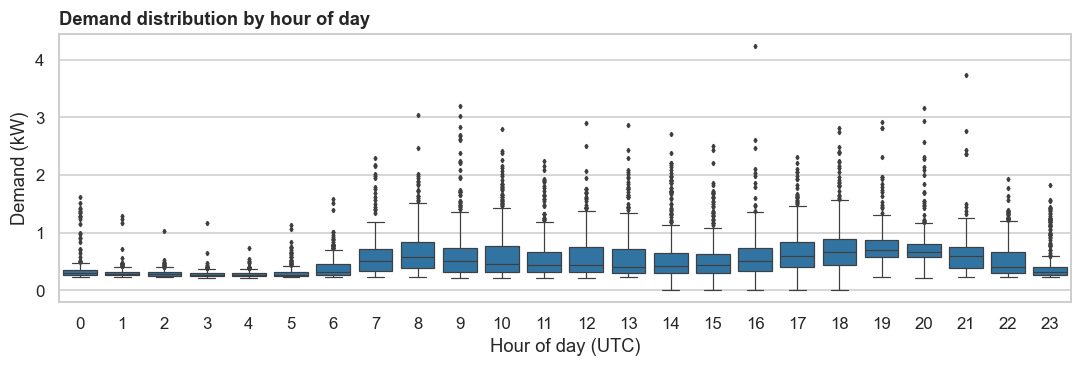

PosixPath('../reports/figures/interactive/03_hourly_boxplot_interactive.html')

In [11]:
# Figure 3: Hourly Demand Boxplots
# Visualizing the variability of demand across each hour of the day
fig, ax = plt.subplots(figsize=(10, 3.5))

sns.boxplot(data=df, x='hour', y='Demand', color=COLORS['demand'], ax=ax, fliersize=2, linewidth=0.8)
ax.set_title('Demand distribution by hour of day')
ax.set_xlabel('Hour of day (UTC)')
ax.set_ylabel('Demand (kW)')

fig.tight_layout()
save_figure(fig, '03_hourly_boxplot')
plt.show()

# Interactive version (save only, no display)
interactive_fig = px.box(df, x='hour', y='Demand', color_discrete_sequence=[COLORS['demand']])
interactive_fig.update_layout(title='Demand distribution by hour of day', xaxis_title='Hour of day (UTC)', yaxis_title='Demand (kW)')
save_interactive(interactive_fig, '03_hourly_boxplot_interactive')

**Figure 3.** Hourly boxplots highlighting evening peaks and variability important for storage dispatch.

## Figure 4 – Correlation heatmap

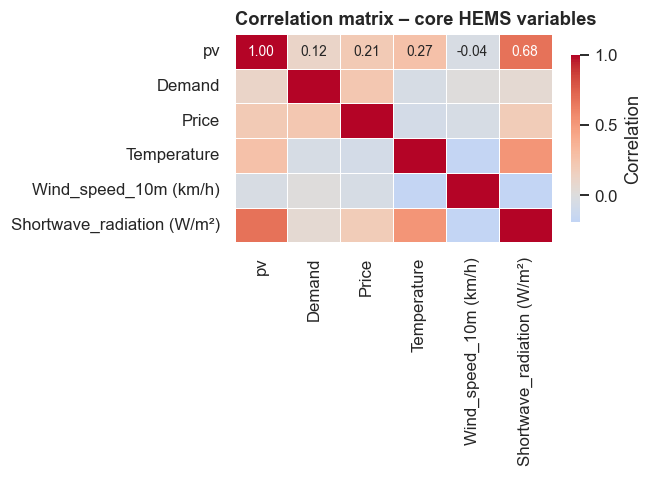

PosixPath('../reports/figures/interactive/03_correlation_heatmap_interactive.html')

In [12]:
# Figure 4: Correlation Heatmap
# Examining linear relationships between core HEMS variables
corr_cols = ['pv', 'Demand', 'Price', 'Temperature', 'Wind_speed_10m (km/h)', 'Shortwave_radiation (W/m²)']
correlation = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(6, 4.5))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5, 
            cbar_kws={'label': 'Correlation', 'shrink': 0.8}, ax=ax, annot_kws={'size': 9})
ax.set_title('Correlation matrix – core HEMS variables')

fig.tight_layout()
save_figure(fig, '03_correlation_heatmap')
plt.show()

# Interactive version (save only, no display)
interactive_fig = go.Figure(data=go.Heatmap(z=correlation.values, x=corr_cols, y=corr_cols, colorscale='RdBu', zmin=-1, zmax=1, colorbar=dict(title='ρ')))
interactive_fig.update_layout(title='Correlation matrix – core HEMS variables')
save_interactive(interactive_fig, '03_correlation_heatmap_interactive')

**Figure 4.** Correlations between load, generation, price, and weather drivers used to guide feature engineering.

## Figure 5 – Typical daily profiles

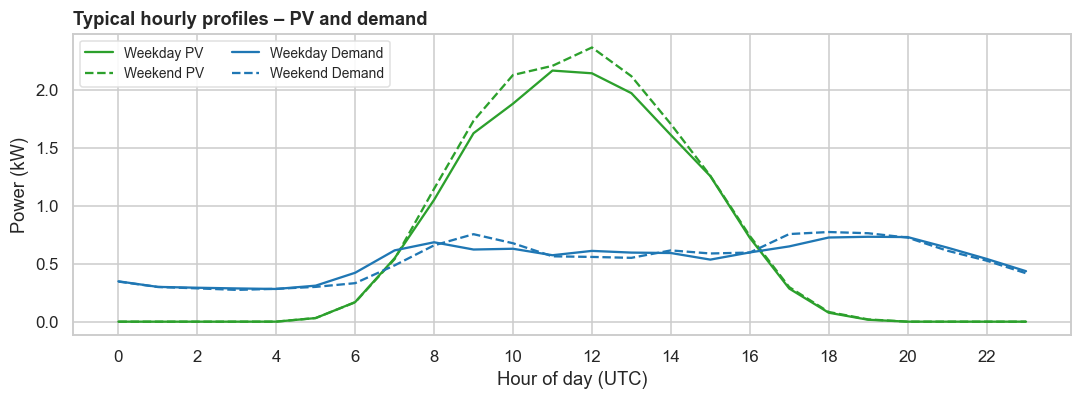

PosixPath('../reports/figures/interactive/03_typical_profiles_interactive.html')

In [13]:
# Figure 5: Typical Daily Profiles (Weekday vs. Weekend)
# This is the most informative visualization for HEMS as it shows when PV-demand mismatch occurs
profile = df.groupby(['is_weekend', 'hour'])[['pv', 'Demand']].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 3.8))

weekday = profile[profile['is_weekend'] == False]
weekend = profile[profile['is_weekend'] == True]

# Plot weekday and weekend profiles for both PV and Demand
ax.plot(weekday['hour'], weekday['pv'], color=COLORS['pv'], linewidth=1.5, label='Weekday PV')
ax.plot(weekend['hour'], weekend['pv'], color=COLORS['pv'], linestyle='--', linewidth=1.5, label='Weekend PV')
ax.plot(weekday['hour'], weekday['Demand'], color=COLORS['demand'], linewidth=1.5, label='Weekday Demand')
ax.plot(weekend['hour'], weekend['Demand'], color=COLORS['demand'], linestyle='--', linewidth=1.5, label='Weekend Demand')

ax.set_title('Typical hourly profiles – PV and demand')
ax.set_xlabel('Hour of day (UTC)')
ax.set_ylabel('Power (kW)')
ax.legend(ncol=2, loc='upper left', fontsize=9)
ax.set_xticks(range(0, 24, 2))

fig.tight_layout()
save_figure(fig, '03_typical_profiles')
plt.show()

# Interactive version (save only, no display)
interactive_fig = go.Figure()
interactive_fig.add_trace(go.Scatter(x=weekday['hour'], y=weekday['pv'], name='Weekday PV', mode='lines'))
interactive_fig.add_trace(go.Scatter(x=weekend['hour'], y=weekend['pv'], name='Weekend PV', mode='lines', line=dict(dash='dash')))
interactive_fig.add_trace(go.Scatter(x=weekday['hour'], y=weekday['Demand'], name='Weekday Demand', mode='lines'))
interactive_fig.add_trace(go.Scatter(x=weekend['hour'], y=weekend['Demand'], name='Weekend Demand', mode='lines', line=dict(dash='dash')))
interactive_fig.update_layout(title='Typical hourly profiles – PV and demand', xaxis_title='Hour of day (UTC)', yaxis_title='kW')
save_interactive(interactive_fig, '03_typical_profiles_interactive')

**Figure 5.** Weekday versus weekend profiles clarifying when storage and flexible loads must bridge the PV-demand mismatch.

## Reflection
The typical hourly profiles (Figure 5) are the most informative for HEMS decisions because they expose when demand reliably exceeds solar supply, quantify how behaviour shifts on weekends, and therefore directly inform storage charging/discharging strategies aimed at maximising self-consumption and minimising grid imports.